# Importing Necessary Libraries

In [1]:
#Libariries for Data Analysis
import pandas as pd
import numpy as np

#Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#Libraries for ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

#To make the cells look cleaner
import warnings

# Creating Dataframe

In [12]:
def Dataframe(csv):
    df = pd.read_csv(csv, index_col = 'match_id')
    
    #Based on the instructions on Kaggle, the columns will have missing columns if there was no data
    ##in the first 5 minutes. Filling in a value of 0 to clean up the columns
    df.fillna(0, inplace=True)
    
    #Since there are so many columns, I am going to engineer some features that consolidate the information 
    #presented since this is a team game and the team information should provide more context then it being 
    #broken up by individual
    
    df['Radiant_Total_xp'] = df[['r1_xp', 'r2_xp', 'r3_xp', 'r4_xp', 'r5_xp']].sum(axis=1)
    df['Dire_Total_xp'] = df[['d1_xp', 'd2_xp', 'd3_xp', 'd4_xp', 'd5_xp']].sum(axis=1)
    

    df['Radiant_Total_gold'] = df[['r1_gold', 'r2_gold', 'r3_gold', 'r4_gold', 'r5_gold']].sum(axis=1)
    df['Dire_Total_gold'] = df[['d1_gold', 'd2_gold', 'd3_gold', 'd4_gold', 'd5_gold']].sum(axis=1)
    

    df['Radiant_Total_lh'] = df[['r1_lh', 'r2_lh', 'r3_lh', 'r4_lh', 'r5_lh']].sum(axis=1)
    df['Dire_Total_lh'] = df[['d1_lh', 'd2_lh', 'd3_lh', 'd4_lh', 'd5_lh']].sum(axis=1)
    

    df['Radiant_Total_kills'] = df[['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills']].sum(axis=1)
    df['Dire_Total_kills'] = df[['d1_kills', 'd2_kills', 'd3_kills', 'd4_kills', 'd5_kills']].sum(axis=1)
    

    #Not including Total Deaths because it is the same as the total kills 
    #of the other team (possible source of multicollinearity)
    
    df2 = df.drop(columns=['r1_xp', 'r2_xp', 'r3_xp', 'r4_xp', 'r5_xp',
                      'd1_xp', 'd2_xp', 'd3_xp', 'd4_xp', 'd5_xp',
                      'r1_gold', 'r2_gold', 'r3_gold', 'r4_gold', 'r5_gold',
                      'd1_gold', 'd2_gold', 'd3_gold', 'd4_gold', 'd5_gold',
                      'r1_lh', 'r2_lh', 'r3_lh', 'r4_lh', 'r5_lh',
                      'd1_lh', 'd2_lh', 'd3_lh', 'd4_lh', 'd5_lh',
                      'r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills',
                      'd1_kills', 'd2_kills', 'd3_kills', 'd4_kills', 'd5_kills',
                      'r1_deaths', 'r2_deaths', 'r3_deaths', 'r4_deaths', 'r5_deaths',
                      'd1_deaths', 'd2_deaths', 'd3_deaths', 'd4_deaths', 'd5_deaths',
                      'r1_level', 'r2_level', 'r3_level', 'r4_level', 'r5_level',
                       'd1_level', 'd2_level', 'd3_level', 'd4_level', 'd5_level'])
    
    return df2

In [13]:
df = Dataframe('train.csv')
df2 = Dataframe('test.csv')

In [14]:
df.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,dire_first_ward_time,radiant_win,Radiant_Total_xp,Dire_Total_xp,Radiant_Total_gold,Dire_Total_gold,Radiant_Total_lh,Dire_Total_lh,Radiant_Total_kills,Dire_Total_kills
match_id,,,,,,,,,,,,,,,,,,,,,
1,44,7,97,6,29,9,85,8,40,7,...,0.0,1,5497,6419,4615,4348,46,52,0,0
2,77,6,47,15,68,9,20,7,51,7,...,-9.0,0,5820,5115,6021,3989,61,30,2,0
3,66,7,22,8,76,6,23,6,87,7,...,18.0,1,8085,6007,6491,5096,75,59,2,1
4,5,10,53,4,1,7,21,9,11,4,...,0.0,0,7756,5937,6436,4907,73,48,2,1
5,102,6,98,9,75,5,21,2,74,6,...,0.0,0,5399,5931,5143,5471,44,42,1,2


In [15]:
df2.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,dire_ward_sentry_count,dire_first_ward_time,Radiant_Total_xp,Dire_Total_xp,Radiant_Total_gold,Dire_Total_gold,Radiant_Total_lh,Dire_Total_lh,Radiant_Total_kills,Dire_Total_kills
match_id,,,,,,,,,,,,,,,,,,,,,
1,57,8,11,8,50,6,59,16,104,7,...,0,-6.0,6795,6602,5316,5430,65,55,0,1
2,51,6,42,5,76,9,23,6,8,7,...,0,0.0,5772,6383,4203,4820,38,45,0,0
3,112,2,71,0,8,7,11,3,26,9,...,0,8.0,6254,5553,5232,4622,53,37,0,1
4,57,9,62,7,44,3,107,6,76,11,...,0,-16.0,6518,5558,5226,4879,49,45,1,1
5,74,5,85,10,97,6,71,5,54,7,...,0,-21.0,6033,6585,4651,5963,39,52,1,3


In [16]:
df.to_csv('Cleaned Training.csv')

In [17]:
df2.to_csv('Cleaned Testing.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181024 entries, 1 to 181024
Data columns (total 45 columns):
r1_hero                        181024 non-null int64
r1_items                       181024 non-null int64
r2_hero                        181024 non-null int64
r2_items                       181024 non-null int64
r3_hero                        181024 non-null int64
r3_items                       181024 non-null int64
r4_hero                        181024 non-null int64
r4_items                       181024 non-null int64
r5_hero                        181024 non-null int64
r5_items                       181024 non-null int64
d1_hero                        181024 non-null int64
d1_items                       181024 non-null int64
d2_hero                        181024 non-null int64
d2_items                       181024 non-null int64
d3_hero                        181024 non-null int64
d3_items                       181024 non-null int64
d4_hero                        181024 non

# Exploratory Data Analysis

## Checking For Class Imbalance Issues
Both classes appear a similar number of times so no class imbalance observed

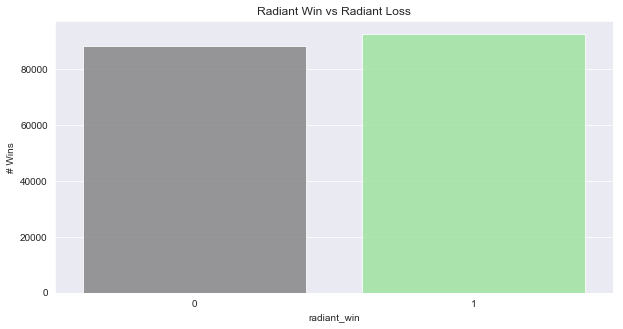

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df.radiant_win, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Radiant Win vs Radiant Loss')
plt.ylabel('# Wins')
plt.show()

This shows that we do not have a class imbalance problem as the 2 classes occur a fairly similar number of times

## Correlation Heat Map To Check For Multicollinearity
Not going to remove the highly correlated columns in the 'First Blood' series of columns because I believe they all provide useful information 

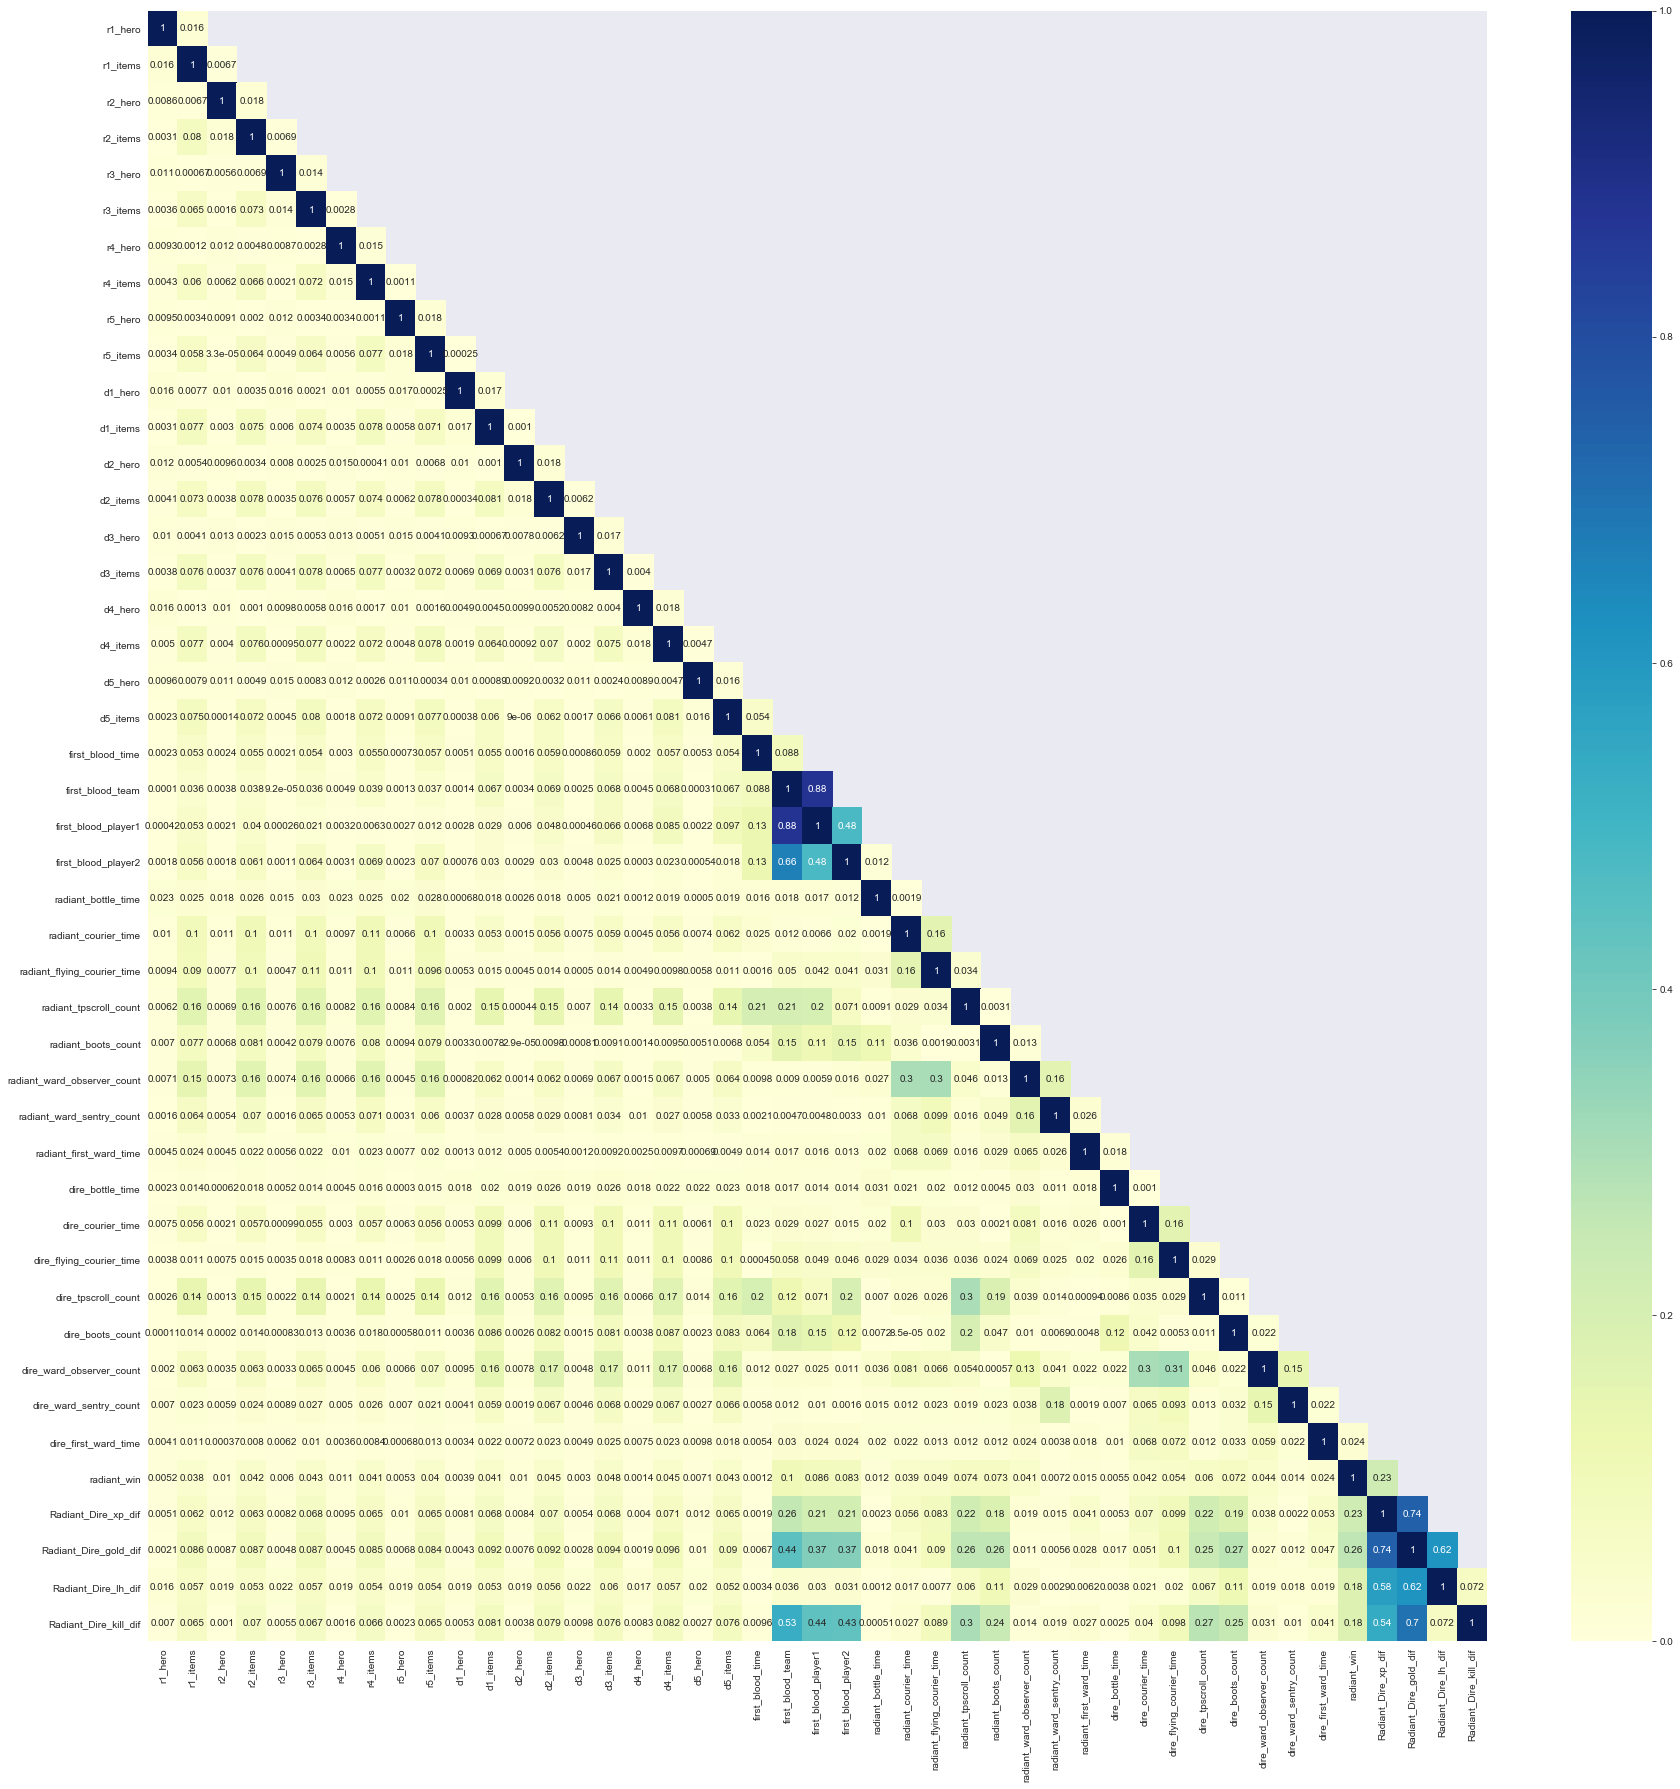

In [11]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(30,30))
sns.heatmap(upper, annot=True, cmap="YlGnBu")